# Install Dependencies

In [ ]:
!pip install lazypredict

# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score


# for exporting data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from lazypredict.Supervised import LazyClassifier

# Import Data

In [ ]:
train=pd.read_csv("Training.csv")
test=pd.read_csv("Testing.csv")

data = pd.concat([test, train])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,120,72,22,56,20.80,0.73,48,0
1,1,71,62,0,0,21.80,0.42,26,0
2,8,74,70,40,49,35.30,0.70,39,0
3,5,88,78,30,0,27.60,0.26,37,0
4,10,115,98,0,0,24.00,1.02,34,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 0 to 2459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 216.2 KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.00,3.82,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2768.00,121.42,31.72,0.00,100.00,117.00,142.00,199.00
BloodPressure,2768.00,68.98,19.13,0.00,64.00,71.00,80.00,122.00
SkinThickness,2768.00,20.55,15.78,0.00,0.00,23.00,33.00,99.00
Insulin,2768.00,79.85,115.66,0.00,0.00,36.00,129.00,846.00
BMI,2768.00,31.98,7.76,0.00,27.18,32.10,36.50,67.10
DiabetesPedigreeFunction,2768.00,0.49,0.36,0.08,0.25,0.38,0.65,2.42
Age,2768.00,32.92,11.36,21.00,24.00,29.00,40.00,81.00
Outcome,2768.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00


In [ ]:
# Replace zeros with NaN in the specified columns
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zeros] = data[columns_with_zeros].replace(0, pd.NA)

print(data.isna().sum())
# get means
column_means = data[columns_with_zeros].mean()

# replace NaN with column mean
for column in columns_with_zeros:
  data[column].fillna(column_means[column], inplace=True)

Pregnancies                    0
Glucose                       18
BloodPressure                128
SkinThickness                810
Insulin                     1333
BMI                           35
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.00,3.82,3.31,0.00,1.00,3.00,6.00,17.00
Glucose,2768.00,122.22,30.16,44.00,100.00,117.00,142.00,199.00
BloodPressure,2768.00,72.33,11.63,24.00,64.00,72.00,80.00,122.00
SkinThickness,2768.00,29.05,8.62,7.00,25.00,29.05,33.00,99.00
Insulin,2768.00,154.03,86.32,14.00,120.00,154.03,154.03,846.00
BMI,2768.00,32.39,6.86,18.20,27.40,32.39,36.50,67.10
DiabetesPedigreeFunction,2768.00,0.49,0.36,0.08,0.25,0.38,0.65,2.42
Age,2768.00,32.92,11.36,21.00,24.00,29.00,40.00,81.00
Outcome,2768.00,0.38,0.49,0.00,0.00,0.00,1.00,1.00


# Outliers Detection

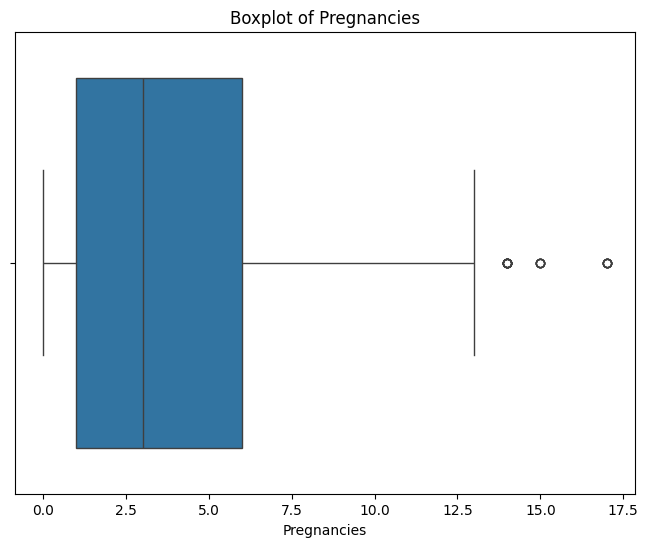

there are 21 outliers


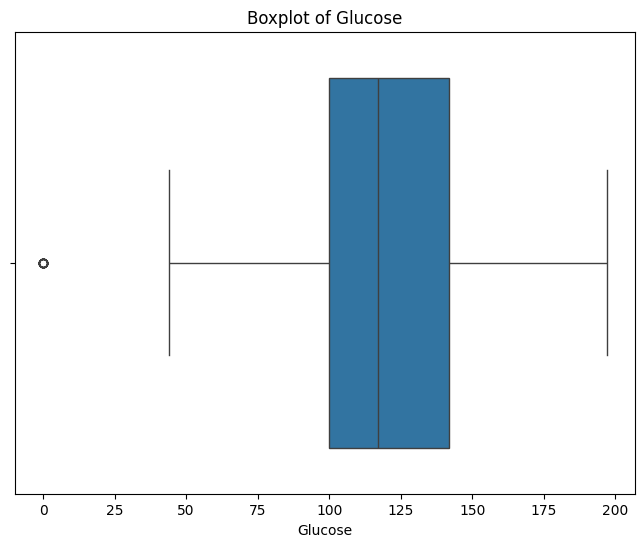

Glucose has no outliers



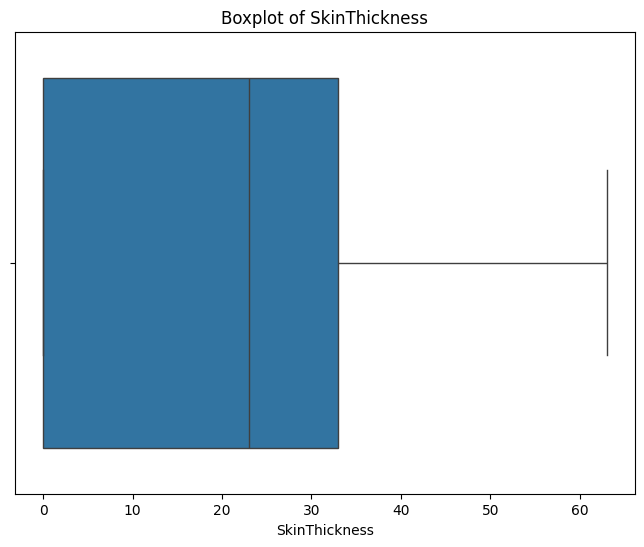

there are 1 outliers


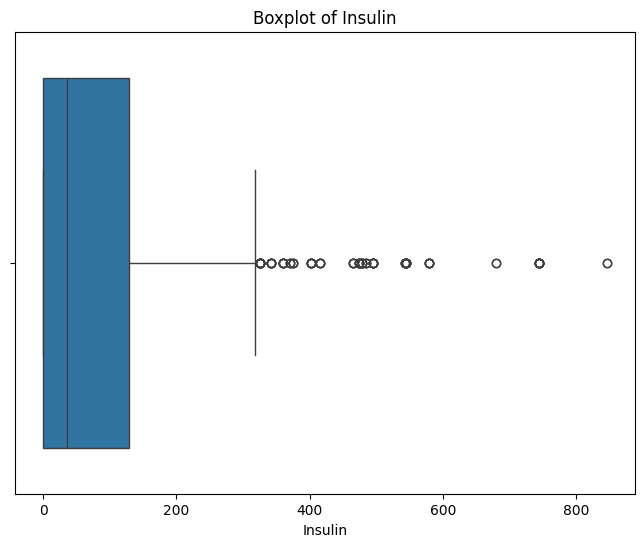

there are 109 outliers


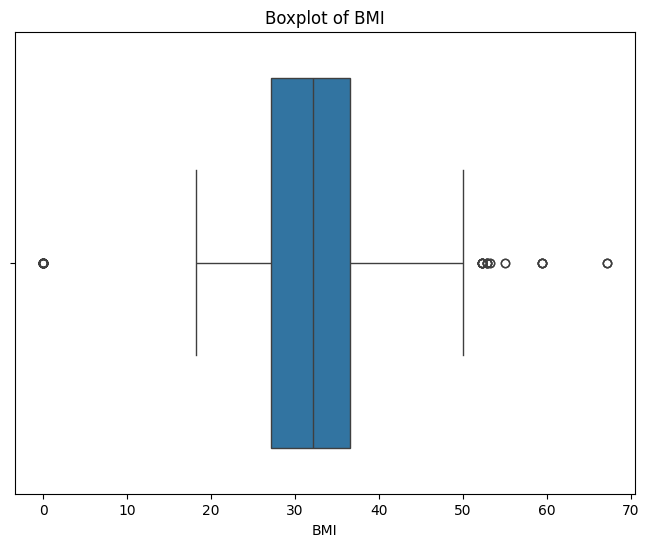

there are 24 outliers


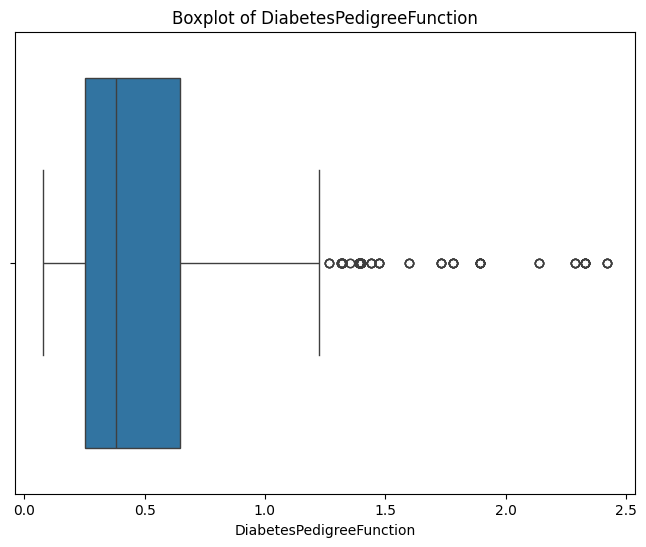

there are 86 outliers


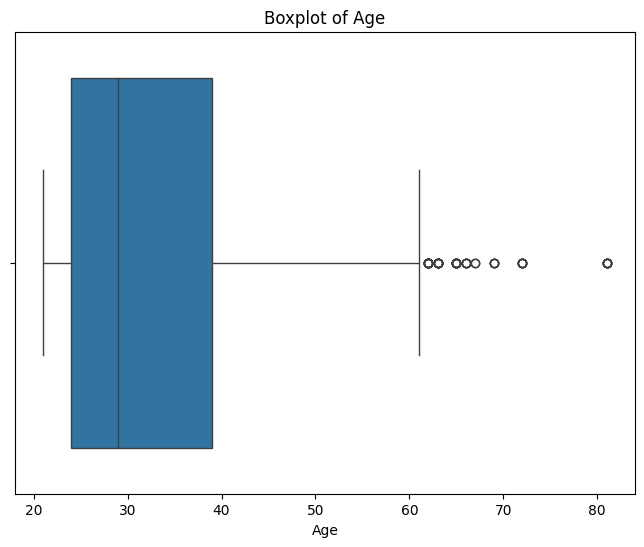

there are 74 outliers


In [ ]:
import numpy as np
columns = ['Pregnancies', 'Glucose', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

for column in columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=train[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Calculate IQR
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define outliers
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))][column]

    if outliers.empty:
        print(f'{column} has no outliers\n')
    else:
        #print(f'Outliers for {column} are:\n{outliers}\n')
        print("there are",len(outliers),"outliers")
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(train[column] >= lower_bound) & (train[column] <= upper_bound)]


# Correlation Analysis

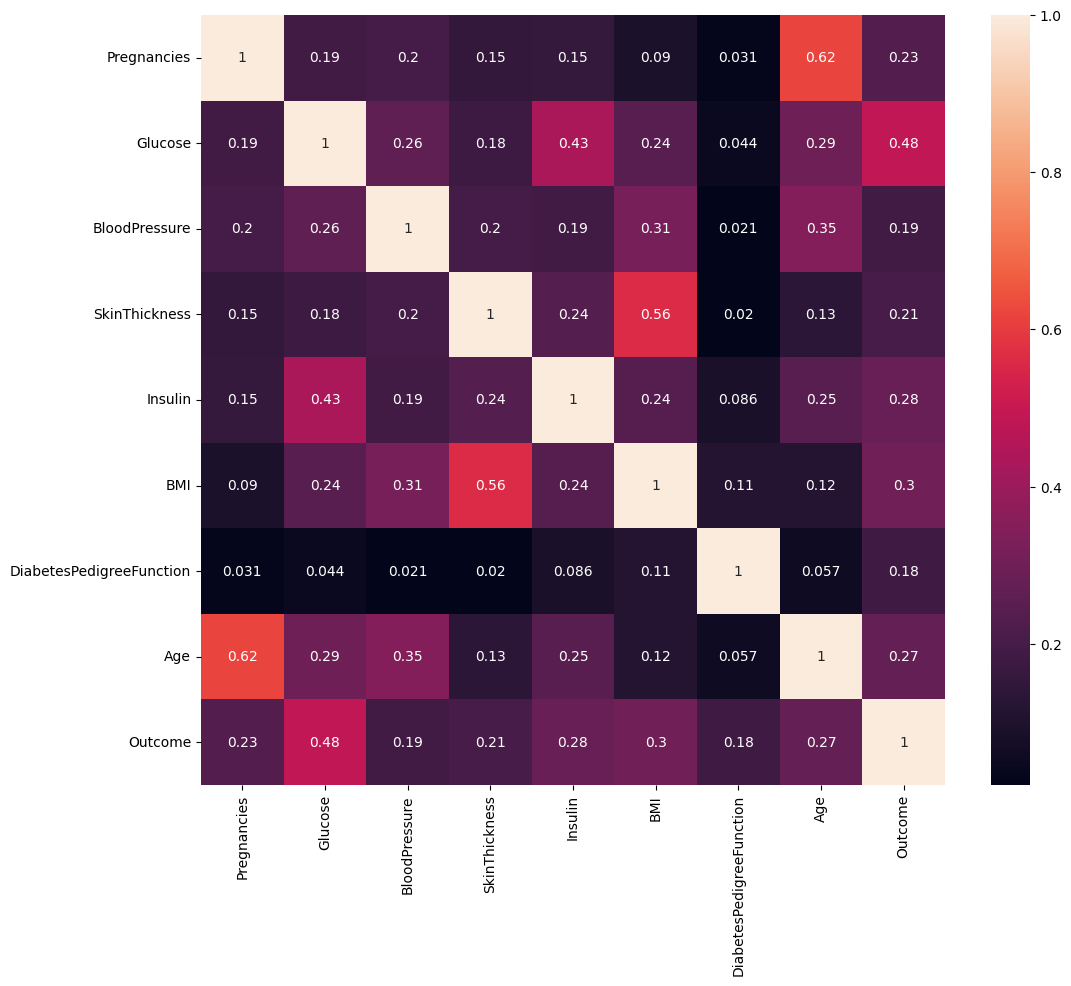

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#Data Split

In [ ]:
from sklearn.model_selection import train_test_split
data.drop(columns=["DiabetesPedigreeFunction"],inplace=True)

X = data.drop(columns=["Outcome"],inplace=False)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("done")

done


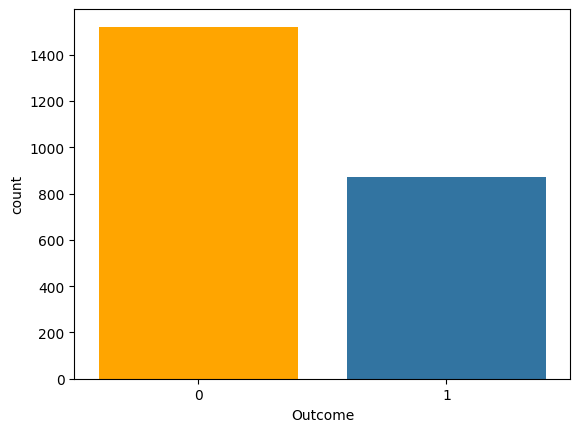

In [ ]:
sns.countplot(x='Outcome', data=data)

ax = plt.gca()

first_bar = ax.patches[0]
first_bar.set_facecolor('orange')
plt.show()

# Choosing Model

In [ ]:
#Using Lazy Predict Library to know what is the most efficient algo
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
mod, pred=clf.fit(X_train,X_test,y_train,y_test)
print(pred.sort_values(by='Accuracy', ascending=False))


100%|██████████| 29/29 [00:02<00:00, 10.43it/s]

[LightGBM] [Info] Number of positive: 840, number of negative: 1374
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 633
[LightGBM] [Info] Number of data points in the train set: 2214, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379404 -> initscore=-0.492080
[LightGBM] [Info] Start training from score -0.492080
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DecisionTreeClassifier             0.97               0.97     0.97      0.97   
XGBClassifier                      0.97               0.97     0.97      0.97   
RandomForestClassifier             0.97               0.97     0.97      0.97   
BaggingClassifier                  0.97               0.96     0.96      0.97   
ExtraTreesClassifier      

In [ ]:
# function that evaluates predictions
def evaluate(y_predicted, y_actual):
  accuracy = accuracy_score(y_actual, y_predicted)
  precision = precision_score(y_actual, y_predicted)
  recall = recall_score(y_actual, y_predicted)
  f1 = f1_score(y_actual, y_predicted)

  cm = confusion_matrix(y_actual, y_predicted)

  # Plot confusion matrix
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()


  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)


X_train is:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  Age
899             0   147.00          85.00          54.00   154.03 42.80   24
2239            0    91.00          68.00          32.00   210.00 39.90   25
1058            5   116.00          74.00          29.05   154.03 25.60   30
1317           12   106.00          80.00          29.05   154.03 23.60   44
284             2   108.00          80.00          29.05   154.03 27.00   52
...           ...      ...            ...            ...      ...   ...  ...
1582            1   122.00          90.00          51.00   220.00 49.70   31
966             3   139.00          54.00          29.05   154.03 25.60   22
1007            1   139.00          46.00          19.00    83.00 28.70   22
1196            2    71.00          70.00          27.00   154.03 28.00   22
700             5   166.00          72.00          19.00   175.00 25.80   51

[1914 rows x 7 columns]
dtest is  <xgboost.core.DMatrix object

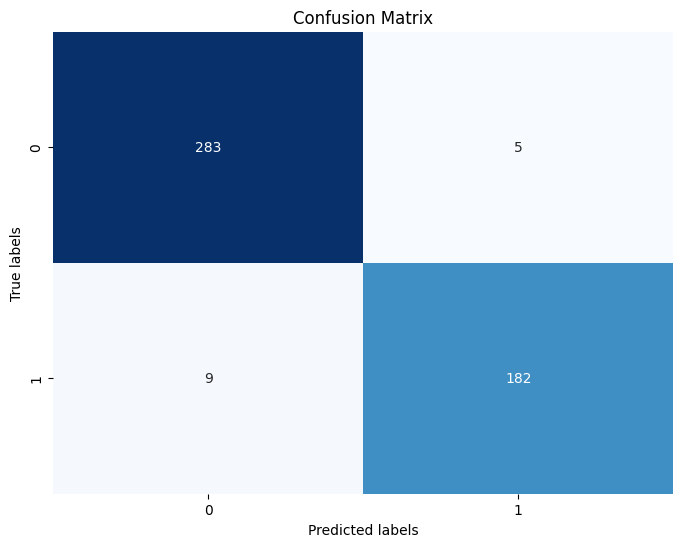

Accuracy: 0.9707724425887265
Precision: 0.9732620320855615
Recall: 0.9528795811518325
F1 Score: 0.9629629629629629


In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

print("X_train is:\n", X_train)
print("dtest is ", dtest)
params = {
    'max_depth': 3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.3
}

num_round = 160
model = xgb.train(params, dtrain, num_round)

import joblib
joblib.dump(model, 'xgb_model.pkl')

predictions = model.predict(dtest)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

evaluate(binary_predictions, y_test)


# Trying SVC

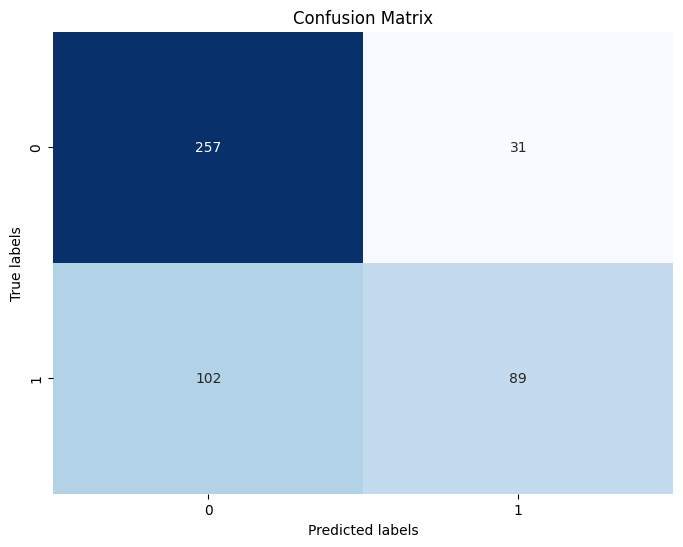

Accuracy: 0.7223382045929019
Precision: 0.7416666666666667
Recall: 0.46596858638743455
F1 Score: 0.572347266881029


In [ ]:
#Trying SVc
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

# for the webpage
import joblib
joblib.dump(svc, 'svc_model.pkl')

y_pred=svc.predict(X_test)

evaluate(y_pred, y_test)

# PCA

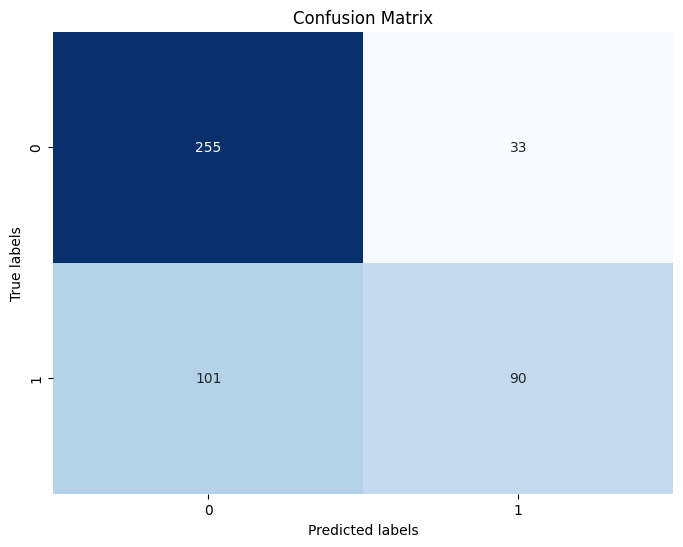

Accuracy: 0.7202505219206681
Precision: 0.7317073170731707
Recall: 0.4712041884816754
F1 Score: 0.5732484076433122


In [ ]:
#Performing dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_test_scaled = scaler.transform(X_test.to_numpy())

components=6

# Perform PCA
pca = PCA(n_components=components)  # Choose number of principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# re-run SVC
svc.fit(X_train_pca, y_train)
y_pred = svc.predict(X_test_pca)
evaluate(y_pred, y_test)


# Neural Network

## Prepare data for PyTorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch.nn.functional as F

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_test_scaled = scaler.transform(X_test.to_numpy())

# move data to gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long).to(device)

y_train_tensor_one_hot = torch.eye(2).to(device)[y_train_tensor]
y_test_tensor_one_hot = torch.eye(2).to(device)[y_test_tensor]



## Model

In [ ]:
# Define the neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.softmax(out)
        return out

## Hyperparameter tuning by grid search

In [ ]:
from sklearn.model_selection import ParameterGrid

input_size = X_train_tensor.shape[1]
output_size = 2

param_grid = {
    'hidden_size': [64, 128, 256, 512, 1024],
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'betas': [(0.9, 0.999), (0.95, 0.99)],
    'eps': [1e-8, 1e-7],
    'epochs': [300, 600, 900]
}

best_accuracy = 0
best_parameters = None
for params in ParameterGrid(param_grid):
    # Initialize the neural network
    model = NeuralNetwork(input_size, params['hidden_size'], output_size).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'],
                           betas=params['betas'], eps=params['eps'])

    # Training the model
    for epoch in range(params['epochs']):
        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor_one_hot)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(predicted.cpu().numpy(), y_test_tensor.cpu().numpy())

    # Update best parameters if current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best parameters:", best_params)

KeyboardInterrupt: 

In [ ]:
print(best_accuracy)

## Training and Evaluation

In [ ]:
# based on the tuned hyperparameters
hidden_size = 64
betas = (0.9, 0.999)
eps = 1e-8
learning_rate = 0.01
num_epochs = 900

# Initialize the neural network
model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate,
                        betas=betas, eps=eps)

# Training the model
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor_one_hot)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(predicted.cpu().numpy(), y_test_tensor.cpu().numpy())
            print()

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f} ', 'Accuracy:', accuracy)

# Evaluation
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    evaluate(predicted.cpu().numpy(), y_test_tensor.cpu().numpy())